In [ ]:
#### Eugenio Perez Molphe Montoya ####
#### 17.06.2024 ####
#### I add the taxonomic information to the genomes that have iroN, then I create figures to visualize the distribution of the gene in Enterobacteriaceae ####

In [1]:
# In case that I want to reset the kernel

%reset -f

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
### Read the taxonomic information files ####

pathEnterobacteriaceae = '/mnt/mnemo6/nnaepf/for_eugenio/tax_info_complete.txt'

# This information will be saved as dictionary with the following structure:
# taxonomic identity number : [taxomic identities in the different taxonomic levels]
with open(pathEnterobacteriaceae) as f:
    enterTaxInfoList = f.readlines()

enterTaxInfo = {}
for i in enterTaxInfoList:
    line = i.split('\t')
    enterTaxInfo[line[0]] = line[1].split(';')
    print(enterTaxInfo[line[0]][6])

##### To do: try to get the taxonomic information from left to right, instead of right to left ####

# enterTaxInfo[x][-2] = species level [7]
# enterTaxInfo[x][-3] = genus level [6]

Cronobacter
Klebsiella/Raoultella group
Rahnella
Kosakonia
Cronobacter
Salmonella
Serratia
Enterobacteriaceae incertae sedis
Klebsiella/Raoultella group
Escherichia
Salmonella
Salmonella
Salmonella
Kosakonia
Yersinia
Salmonella
Cedecea
Lelliottia
Escherichia
Kosakonia
Salmonella
unclassified Enterobacteriaceae
Escherichia
Enterobacter
Salmonella
Salmonella
Kosakonia
Enterobacter
Serratia
Yersinia
Shigella
Shigella
Pluralibacter
Kluyvera
Cronobacter
Enterobacteriaceae incertae sedis
Salmonella
Enterobacter
Escherichia
Escherichia
Kosakonia
Klebsiella/Raoultella group
Klebsiella/Raoultella group
Escherichia
Yersinia
Yersinia
Rahnella
Rahnella
Rahnella
Kosakonia
unclassified Enterobacteriaceae
unclassified Enterobacteriaceae
Citrobacter
Cedecea
Salmonella
Enterobacter
Cedecea
Cedecea
Enterobacter
Rahnella
Rahnella
Leclercia
Citrobacter
Kosakonia
Klebsiella/Raoultella group
unclassified Enterobacteriaceae
Enterobacter
Enterobacter
unclassified Enterobacteriaceae
unclassified Enterobacteria

In [4]:
#### Read the iroN taxonomy identity numbers file ####
pathEnterobacteriaceae = '/mnt/mnemo5/eugenio/IroN_project/Files/04_Blast_annotations/enterobacteriaceae_blasted_sequences.taxonomy_identity_numbers.txt'

# Read the file and save it as a list of taxonomic identity numbers
with open(pathEnterobacteriaceae) as f:
    iroNtaxInfo = f.readlines()

for i in range(len(iroNtaxInfo)):
    iroNtaxInfo[i] = iroNtaxInfo[i].strip()

# Let's remove the repeated information, some genomes have multiple hits of iroN,
# and that messes up the percentage of genera/sp with iroN
iroNtaxInfo = list(set(iroNtaxInfo))
print(len(iroNtaxInfo))

# Then I can create a new list with the taxonomic information for each genome that has iroN, I'll count the repeated taxa to get how many genomes with iroN are present in each taxon
# And a dictionary: key(taxon) : value(list with two values: genomes iroN with and total genomes)
# Then I can create a bar plot with the taxonomic information

125


In [5]:
### Create a list of taxonomic information for the genomes that have iroN,
# the proportion of genomes with iroN per sp and genus and the number of genomes with iroN ####

# The total number of genomes available per sp and genus

# Genus
genusList = []
for i in enterTaxInfo:
    genusList.append(enterTaxInfo[i][6])

countsGenus = {}
for string in genusList:
    if string in countsGenus:
        countsGenus[string] += 1
    else:
        countsGenus[string] = 1

# Species
speciesList = []
for i in enterTaxInfo:
    if enterTaxInfo[i][7]:
        speciesList.append(enterTaxInfo[i][7].strip())
    else:
        speciesList.append(enterTaxInfo[i][-1].strip())

countsSpecies = {}  
for string in speciesList:
    if string in countsSpecies:
        countsSpecies[string] += 1
    else:
        countsSpecies[string] = 1

# Create the list of taxonomic information for the genomes that have iroN
iroNtaxInfoGenus = []
iroNtaxInfoSpecies = []
for i in iroNtaxInfo:
    iroNtaxInfoGenus.append(enterTaxInfo[i][6])
    if enterTaxInfo[i][7]:
        iroNtaxInfoSpecies.append(enterTaxInfo[i][7].strip())
    else:
        iroNtaxInfoSpecies.append(enterTaxInfo[i][-1].strip())

# Count the number of genomes with iroN per sp and genus
countsGenusIroN = {}
for string in iroNtaxInfoGenus:
    if string in countsGenusIroN:
        countsGenusIroN[string] += 1
    else:
        countsGenusIroN[string] = 1

countsSpeciesIroN = {}
for string in iroNtaxInfoSpecies:
    string = string.strip()
    if string in countsSpeciesIroN:
        countsSpeciesIroN[string] += 1
    else:
        countsSpeciesIroN[string] = 1

print(countsGenusIroN)
print(countsSpeciesIroN)

{'Kosakonia': 9, 'Salmonella': 22, 'Cedecea': 3, 'Citrobacter': 13, 'Rahnella': 8, 'unclassified Enterobacteriaceae': 24, 'Klebsiella/Raoultella group': 18, 'Kluyvera': 2, 'Enterobacter': 8, 'Cronobacter': 8, 'Escherichia': 1, 'Serratia': 3, 'Leclercia': 3, 'Shigella': 1, 'Lelliottia': 2}
{'unclassified Kosakonia': 2, 'Salmonella bongori': 16, 'Cedecea lapagei': 1, 'Citrobacter telavivensis': 1, 'unclassified Rahnella': 4, 'Enterobacteriaceae bacterium RIT697': 1, 'Raoultella': 5, 'Salmonella enterica': 5, 'Enterobacteriaceae bacterium RIT702': 1, 'Kluyvera genomosp. 3': 1, 'Citrobacter freundii complex': 5, 'Enterobacter cloacae complex': 7, 'unclassified Citrobacter': 4, 'Enterobacteriaceae bacterium UBA3107': 1, 'Enterobacteriaceae bacterium UBA7406': 1, 'Klebsiella': 13, 'Cronobacter dublinensis': 2, 'Enterobacteriaceae bacterium UBA2571': 1, 'Enterobacteriaceae bacterium EKM102V': 1, 'unclassified Kluyvera': 1, 'Escherichia coli': 1, 'Citrobacter amalonaticus': 1, 'Cronobacter sak

In [6]:
### The same but for Salmonella ###

# Let's read the list of Salmonella genomes that have iroN
pathSalmonella = '/mnt/mnemo5/eugenio/IroN_project/Files/04_Blast_annotations/salmonella_blasted_sequences.ncbi_codes.txt'

# Read the file and save it as a list of taxonomic identity numbers
with open(pathSalmonella) as f:
    salmonellaTaxInfo = f.readlines()
salmonellaTaxInfo = [i.strip() for i in salmonellaTaxInfo]
print(salmonellaTaxInfo[0:10])

# Now let's read the metadata file with the taxonomy of the Salmonella species
# The path of the metadata file
pathMetadata = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_metadata.txt'

# Read the metadata file
with open(pathMetadata, 'r') as f:
    metadata = f.readlines()
metadata.pop(0) # Remove the header (accession,bioproject_accession,species_pg3,genus_pg3,Completeness,Contamination,number_of_contigs)
metadata = [i.strip().split(',') for i in metadata]

# Create a dictionary with the taxonomic information of the Salmonella genomes
salmonellaTaxInfoDict = {}
for i in metadata:
    salmonellaTaxInfoDict[i[0]] = [i[2], i[3]]

# Create a list of taxonomic information for the total Salmonella genomes with Salmonella
speciesListIroN = []
for i in salmonellaTaxInfo:
    speciesListIroN.append(salmonellaTaxInfoDict[i][0])

genusListIroN = []
for i in salmonellaTaxInfo:
    genusListIroN.append(salmonellaTaxInfoDict[i][1])

# And let's count the total number of genomes per sp and genus
salmonellaGenusTotal = []
for i in metadata:
    salmonellaGenusTotal.append(i[3])
salmonellaSpTotal = []
for i in metadata:
    salmonellaSpTotal.append(i[2])

# I'll keep using the dictionaries countsGenus and countsSpecies from the last cell
for string in salmonellaGenusTotal:
    if string in countsGenus:
        countsGenus[string] += 1
    else:
        countsGenus[string] = 1

for string in salmonellaSpTotal:
    if string in countsSpecies:
        countsSpecies[string] += 1
    else:
        countsSpecies[string] = 1

# Count the number of genomes per sp and genus with the same dictionaries countsGenusIroN and countsSpeciesIroN
for string in genusListIroN:
    if string in countsGenusIroN:
        countsGenusIroN[string] += 1
    else:
        countsGenusIroN[string] = 1

for string in speciesListIroN:
    if string in countsSpeciesIroN:
        countsSpeciesIroN[string] += 1
    else:
        countsSpeciesIroN[string] = 1

print(countsGenusIroN)
print(countsSpeciesIroN)

['GCA_000278545.1', 'GCA_000380325.1', 'GCA_000411815.1', 'GCA_000442415.1', 'GCA_000487415.1', 'GCA_000494505.1', 'GCA_000623695.2', 'GCA_000624495.2', 'GCA_000625715.2', 'GCA_000626055.2']
{'Kosakonia': 9, 'Salmonella': 7494, 'Cedecea': 3, 'Citrobacter': 13, 'Rahnella': 8, 'unclassified Enterobacteriaceae': 24, 'Klebsiella/Raoultella group': 18, 'Kluyvera': 2, 'Enterobacter': 8, 'Cronobacter': 8, 'Escherichia': 1, 'Serratia': 3, 'Leclercia': 3, 'Shigella': 1, 'Lelliottia': 2}
{'unclassified Kosakonia': 2, 'Salmonella bongori': 18, 'Cedecea lapagei': 1, 'Citrobacter telavivensis': 1, 'unclassified Rahnella': 4, 'Enterobacteriaceae bacterium RIT697': 1, 'Raoultella': 5, 'Salmonella enterica': 7475, 'Enterobacteriaceae bacterium RIT702': 1, 'Kluyvera genomosp. 3': 1, 'Citrobacter freundii complex': 5, 'Enterobacter cloacae complex': 7, 'unclassified Citrobacter': 4, 'Enterobacteriaceae bacterium UBA3107': 1, 'Enterobacteriaceae bacterium UBA7406': 1, 'Klebsiella': 13, 'Cronobacter dubli

In [7]:
### Final details for the lists ###

# So 'unclassified Enterobacteriaceae' and 'Enterobacteriaceae incertae sedis' are the same thing, I'll join them
if 'Enterobacteriaceae incertae sedis' in countsGenusIroN:
    countsGenusIroN['unclassified Enterobacteriaceae'] += countsGenusIroN['Enterobacteriaceae incertae sedis']
    del countsGenusIroN['Enterobacteriaceae incertae sedis']

if 'Enterobacteriaceae incertae sedis' in countsGenus:
    countsGenus['unclassified Enterobacteriaceae'] += countsGenus['Enterobacteriaceae incertae sedis']
    del countsGenus['Enterobacteriaceae incertae sedis']

# And let's add the genera that don't have iroN
for i in list(countsGenus.keys()):
    if i not in list(countsGenusIroN.keys()):
        countsGenusIroN[i] = 0

# And let's add the species that don't have iroN
for i in list(countsSpecies.keys()):
    if i not in list(countsSpeciesIroN.keys()):
        countsSpeciesIroN[i] = 0

In [8]:
#### Now let's get the proportion of genus/sp with iroN
proportionGenusIroN = {}
for i in countsGenusIroN:
    proportionGenusIroN[i] = countsGenusIroN[i] / countsGenus[i] * 100

proportionSpeciesIroN = {}
for i in countsSpeciesIroN:
    proportionSpeciesIroN[i] = countsSpeciesIroN[i] / countsSpecies[i] * 100

# Let's print the results
print(proportionGenusIroN)
print(proportionSpeciesIroN)

{'Kosakonia': 45.0, 'Salmonella': 99.97331910352187, 'Cedecea': 60.0, 'Citrobacter': 76.47058823529412, 'Rahnella': 34.78260869565217, 'unclassified Enterobacteriaceae': 35.294117647058826, 'Klebsiella/Raoultella group': 94.73684210526315, 'Kluyvera': 28.57142857142857, 'Enterobacter': 40.0, 'Cronobacter': 100.0, 'Escherichia': 6.25, 'Serratia': 18.75, 'Leclercia': 21.428571428571427, 'Shigella': 5.88235294117647, 'Lelliottia': 20.0, 'Yersinia': 0.0, 'Pluralibacter': 0.0}
{'unclassified Kosakonia': 25.0, 'Salmonella bongori': 100.0, 'Cedecea lapagei': 100.0, 'Citrobacter telavivensis': 100.0, 'unclassified Rahnella': 44.44444444444444, 'Enterobacteriaceae bacterium RIT697': 100.0, 'Raoultella': 100.0, 'Salmonella enterica': 99.97325130399894, 'Enterobacteriaceae bacterium RIT702': 100.0, 'Kluyvera genomosp. 3': 100.0, 'Citrobacter freundii complex': 83.33333333333334, 'Enterobacter cloacae complex': 43.75, 'unclassified Citrobacter': 80.0, 'Enterobacteriaceae bacterium UBA3107': 100.0,

In [13]:
print(proportionGenusIroN.keys())

dict_keys(['Kosakonia', 'Salmonella', 'Cedecea', 'Citrobacter', 'Rahnella', 'unclassified Enterobacteriaceae', 'Klebsiella/Raoultella group', 'Kluyvera', 'Enterobacter', 'Cronobacter', 'Escherichia', 'Serratia', 'Leclercia', 'Shigella', 'Lelliottia', 'Yersinia', 'Pluralibacter'])


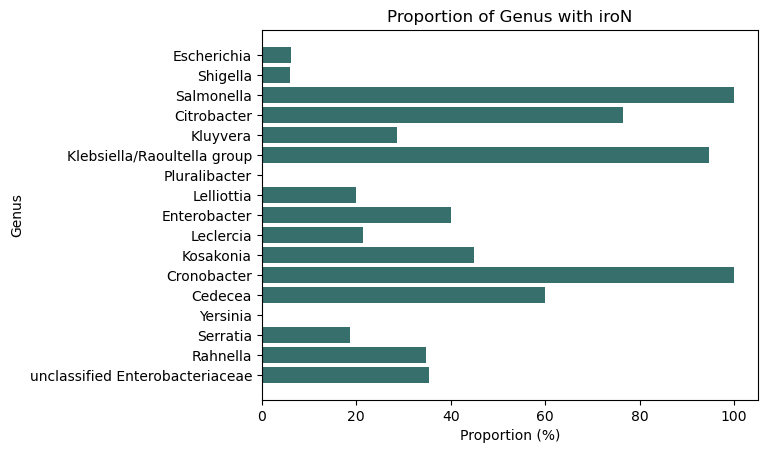

In [19]:
### Let's graph the results ###

# Data for the plot
categories = ['unclassified Enterobacteriaceae', 'Rahnella', 'Serratia', 'Yersinia', 'Cedecea', 'Cronobacter', 'Kosakonia', 'Leclercia', 'Enterobacter', 
              'Lelliottia', 'Pluralibacter', 'Klebsiella/Raoultella group', 'Kluyvera', 'Citrobacter', 'Salmonella', 'Shigella', 'Escherichia']
percentages = [proportionGenusIroN[i] for i in categories]

# Create the horizontal bar plot
plt.barh(categories, percentages, color='#376F6D')

# Set the labels and title
plt.xlabel('Proportion (%)')
plt.ylabel('Genus')
plt.title('Proportion of Genus with iroN')

# Display the plot
plt.show()

In [20]:
### Let's save the results ###

# Data for the pandas dataframe
dataGenus = {'Genus': list(countsGenus.keys()), 'Total genomes': list(countsGenus.values()), 'Genomes with iroN': list(countsGenusIroN.values()), 'Proportion (%)': list(proportionGenusIroN.values())}
dataSpecies = {'Species': list(countsSpecies.keys()), 'Total genomes': list(countsSpecies.values()), 'Genomes with iroN': list(countsSpeciesIroN.values()), 'Proportion (%)': list(proportionSpeciesIroN.values())}

# Create the pandas dataframes
dfGenus = pd.DataFrame(dataGenus)
dfSpecies = pd.DataFrame(dataSpecies)

# Save the dataframes as csv files
pathGenus = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Genus_iroN_proportion.csv'
pathSp = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Species_iroN_proportion.csv'

dfGenus.to_csv(pathGenus, index=False)
dfSpecies.to_csv(pathSp, index=False)

I'll do the heatmap of the promoters

In [2]:
# Now let's read the metadata file with the taxonomy of the Salmonella species
# The path of the metadata file
pathMetadata = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_metadata.txt'

# Read the metadata file
with open(pathMetadata, 'r') as f:
    metadata = f.readlines()
metadata.pop(0) # Remove the header (accession,bioproject_accession,species_pg3,genus_pg3,Completeness,Contamination,number_of_contigs)
metadata = [i.strip().split(',') for i in metadata]

# Create a dictionary with the taxonomic information of the Salmonella genomes
salmonellaTaxInfoDict = {}
for i in metadata:
    salmonellaTaxInfoDict[i[0]] = [i[2], i[3]]

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_metadata.txt'

In [12]:
enteroPath = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/enterobacteriaceae_matrix_best_score.tsv'
salmoPath = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_matrix_best_score.tsv'

# Let's read the dataframes
dfEntero = pd.read_csv(enteroPath, sep='\t')
dfSalmo = pd.read_csv(salmoPath, sep='\t')

# Let's change the name of the column with the genome names
dfEntero = dfEntero.rename(columns={'Unnamed: 0' : 'Genome'})
dfSalmo = dfSalmo.rename(columns={'Unnamed: 0' : 'Genome'})

dfEntero['Genome'] = dfEntero['Genome'].astype(str)

# Let's replace the genome codes with sp names, I need the dictionary enterTaxInfo
for i in enterTaxInfo:
    dfEntero = dfEntero.replace(i, enterTaxInfo[i][7].strip())

print(dfEntero)

                          Genome  arcA  argR2  deoR  fis  lrp  rpoD16
0          Citrobacter europaeus     0      0     1    0    0       0
1             Salmonella bongori     0      1     0    0    0       0
2             Salmonella bongori     0      1     0    0    0       0
3   Citrobacter freundii complex     0      0     1    0    0       0
4            Salmonella enterica     0      1     0    0    0       0
5   Citrobacter freundii complex     0      0     1    0    0       0
6            Salmonella enterica     0      1     0    0    0       0
7       Enterobacter bugandensis     0      0     0    0    1       0
8             Salmonella bongori     0      1     0    0    0       0
9   Enterobacter cloacae complex     0      0     0    0    0       1
10                    Klebsiella     1      0     0    0    0       0
11            Salmonella bongori     0      0     0    0    0       1
12  Citrobacter freundii complex     0      0     1    0    0       0
13            Salmon

In [ ]:
# Let's do the same for Salmonella
pathNCBIcodes = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Salmonella_header_NCBIcode.csv'

# Create the dictionary with the NCBI codes
with open(pathNCBIcodes, 'r') as f:
    lines = f.readlines()
    headerToNCBIcodeSalmo = {}
    for line in lines:
        line = line.strip().split(',')
        headerToNCBIcodeSalmo[line[0]] = line[1]

# Now let's replace the genome codes with the NCBI taxonomic codes
dfSalmo['Genome'] = dfSalmo['Genome'].astype(str) + ".1"
for i in headerToNCBIcodeSalmo:
    dfSalmo = dfSalmo.replace(i, headerToNCBIcodeSalmo[i])

for i in salmonellaTaxInfoDict:
    dfSalmo = dfSalmo.replace(i, salmonellaTaxInfoDict[i][0] + '-' + i)
print(dfSalmo)

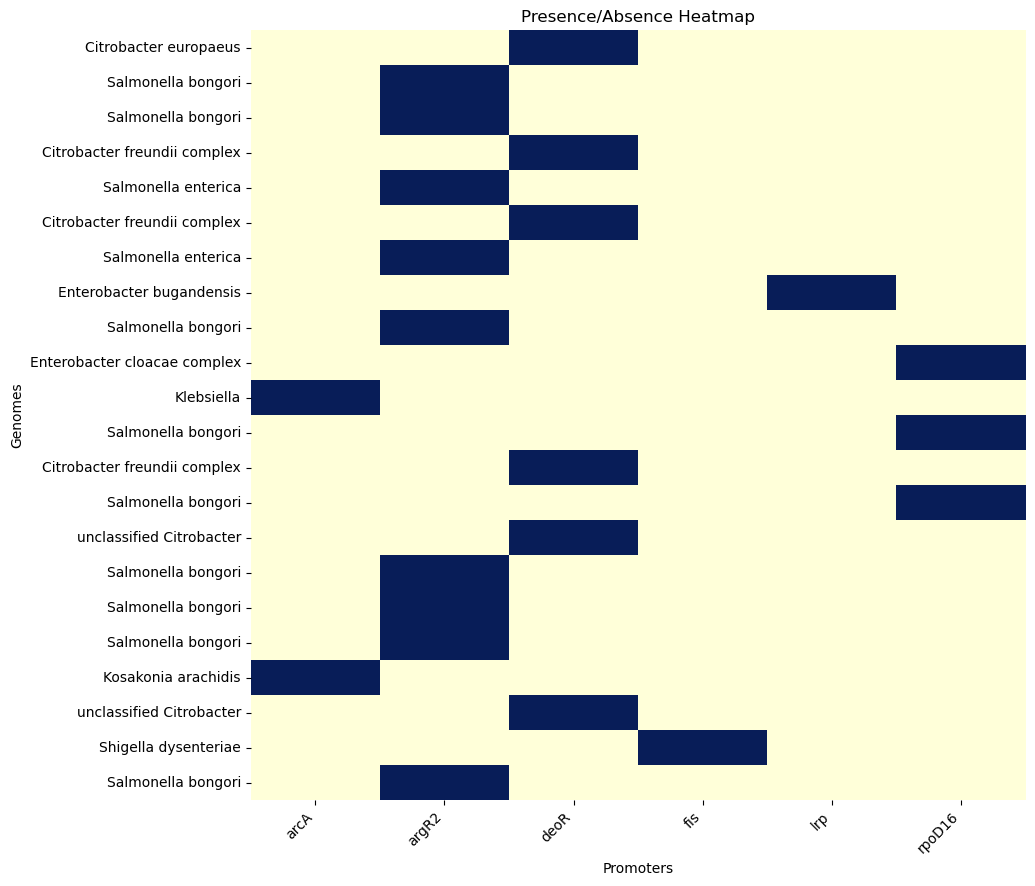

In [13]:
# filtered_df = dfSalmo[(dfSalmo['argR'] == 1) | (dfSalmo['argR2'] == 1)]
# sorted_df = filtered_df.sort_values(by='argR', ascending=False)
df_pivot = dfEntero.set_index('Genome')

# Create the heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_pivot, cmap="YlGnBu", annot=False, cbar=False, linewidths=0, linecolor='black', xticklabels=True)

# In case I want to tick the x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Remove the y-axis labels completely
# ax.set_yticks([])
# ax.set_yticklabels([])

# Customize the heatmap (optional)
plt.title('Presence/Absence Heatmap')
plt.xlabel('Promoters')
plt.ylabel('Genomes')

# Show the plot
plt.show()

In [ ]:
print(filtered_df)